In [1]:
from scipy.constants import c, h, k
from physics.electromagnetism import waveguide

In [2]:
f_lpf, T_lpf = np.loadtxt('/Users/daniel/Johnson+Miller/equipment/Cardiff/Cardiff_5.7_icm_LP_filter_transmittance.txt', unpack=True)

In [3]:
# Upgrade this to use simulation data. Note that more of the photon flux is at the low-frequency edge of the band.
waveguide_diameter = 1.35e-3
circular = waveguide.Circular(waveguide_diameter/2)

In [4]:
# The filter data is in GHz.
def lpf(f):
    return np.interp(f, 1e9 * f_lpf, T_lpf, left=1, right=0)

In [5]:
ff = np.linspace(1, 2e12, 1e5)

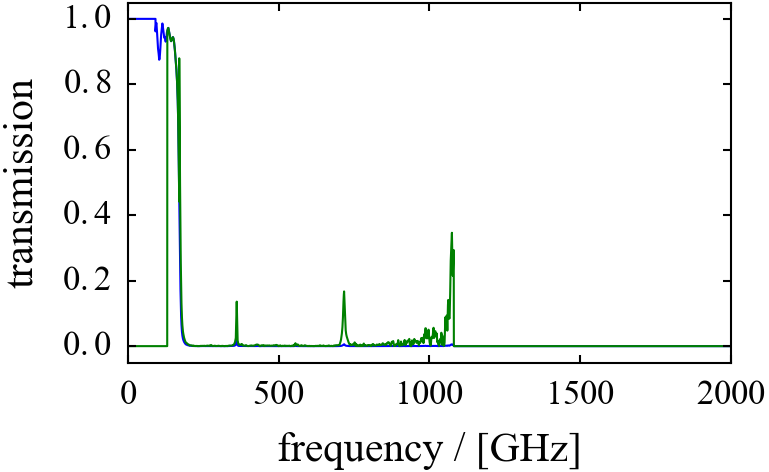

In [6]:
fig, ax = plt.subplots()
ax.plot(ff / 1e9, lpf(ff))
ax.plot(ff / 1e9, lpf(ff) * circular.propagating_modes(ff))
ax.set_xlabel('frequency / [GHz]')
ax.set_ylabel('transmission')
ax.set_ylim(-0.05, 1.05);

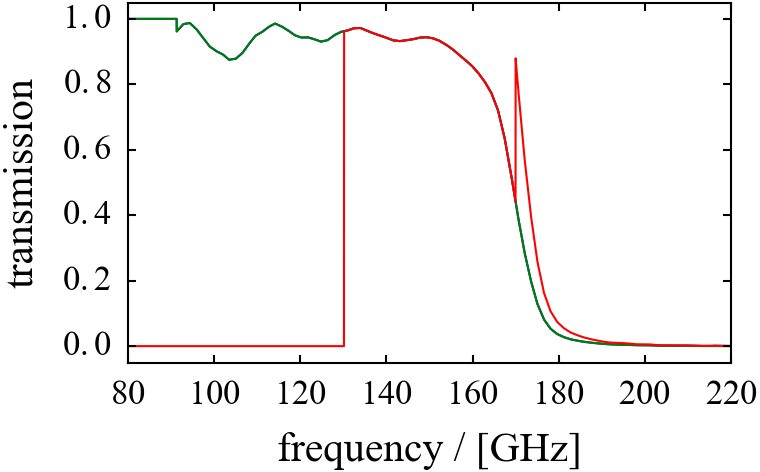

In [7]:
fig, ax = plt.subplots()
ax.plot(ff / 1e9, lpf(ff))
ax.plot(ff / 1e9, lpf(ff))
ax.plot(ff / 1e9, lpf(ff) * circular.propagating_modes(ff))
ax.set_xlabel('frequency / [GHz]')
ax.set_ylabel('transmission')
ax.set_ylim(-0.05, 1.05)
ax.set_xlim(80, 220);

In [8]:
def spectral_brightness(f, T):
    return 2 * h * f**3 * c**-2 * (np.exp(h * f / (k * T)) - 1)**-1

In [9]:
def number_spectral_brightness(f, T):
    return 2 * f**2 * c**-2 * (np.exp(h * f / (k * T)) - 1)**-1

In [10]:
def single_mode_throughput(f):
    return c**2 * f**-2

In [20]:
Ts = np.array([2, 3, 4, 5, 7, 9])

In [21]:
number_spectra = [lpf(ff) * circular.propagating_modes(ff) * single_mode_throughput(ff) *
                  number_spectral_brightness(ff, T) for T in Ts]
number_spectra_unfiltered = [circular.propagating_modes(ff) * single_mode_throughput(ff) *
                             number_spectral_brightness(ff, T) for T in Ts]
number_flux = [np.trapz(s, ff) for s in number_spectra]
number_flux_unfiltered = [np.trapz(s, ff) for s in number_spectra_unfiltered]

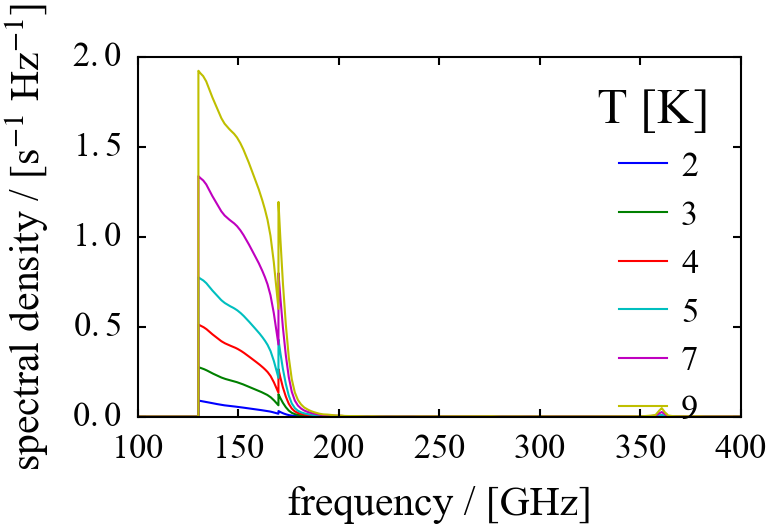

In [22]:
fig, ax = plt.subplots()
for s in number_spectra:
    ax.plot(ff / 1e9, s)
ax.set_xlabel('frequency / [GHz]')
ax.set_ylabel('spectral density / [s$^{-1}$ Hz$^{-1}$]')
ax.legend([str(T) for T in Ts], title='T [K]')
ax.set_xlim(100, 400);

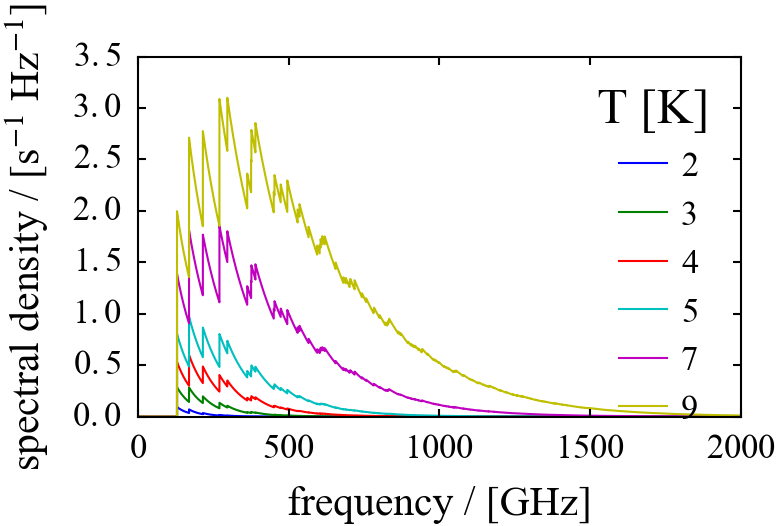

In [23]:
fig, ax = plt.subplots()
for s in number_spectra_unfiltered:
    ax.plot(ff / 1e9, s)
ax.set_xlabel('frequency / [GHz]')
ax.set_ylabel('spectral density / [s$^{-1}$ Hz$^{-1}$]')
ax.legend([str(T) for T in Ts], title='T [K]')
#ax.set_xlim(100, 400);

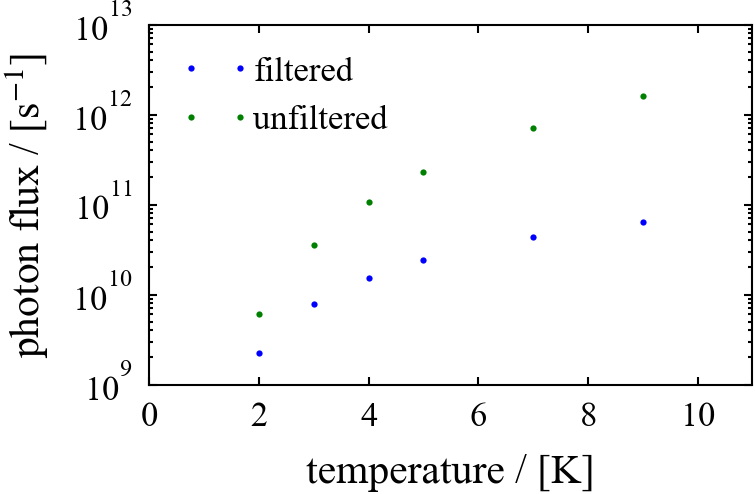

In [30]:
fig, ax = plt.subplots()
ax.plot(Ts, number_flux, '.', label='filtered')
ax.plot(Ts, number_flux_unfiltered, '.', label='unfiltered')
ax.set_xlabel('temperature / [K]')
ax.set_ylabel('photon flux / [s$^{-1}$]')
ax.legend(loc='best')
ax.set_xlim(0, 11)
ax.set_yscale('log');

In [31]:
energy_spectra = [lpf(ff) * circular.propagating_modes(ff) * single_mode_throughput(ff) *
                  spectral_brightness(ff, T) for T in Ts]
energy_spectra_unfiltered = [circular.propagating_modes(ff) * single_mode_throughput(ff) *
                             spectral_brightness(ff, T) for T in Ts]
energy_flux = [np.trapz(s, ff) for s in energy_spectra]
energy_flux_unfiltered = [np.trapz(s, ff) for s in energy_spectra_unfiltered]

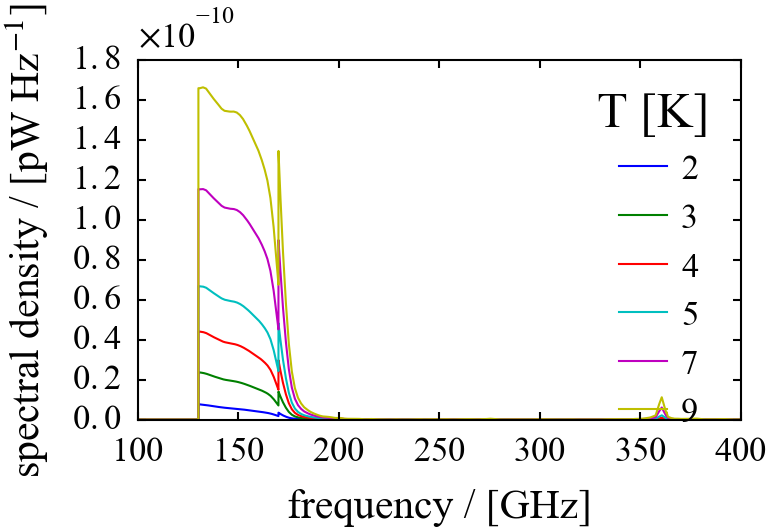

In [32]:
fig, ax = plt.subplots()
for s in energy_spectra:
    ax.plot(ff / 1e9, 1e12 * s)
ax.set_xlabel('frequency / [GHz]')
ax.set_ylabel('spectral density / [pW Hz$^{-1}$]')
ax.legend([str(T) for T in Ts], title='T [K]')
ax.set_xlim(100, 400);

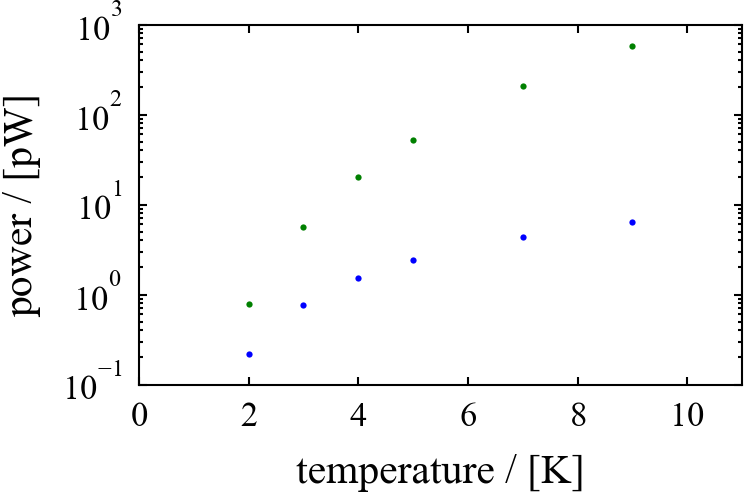

In [33]:
fig, ax = plt.subplots()
ax.plot(Ts, 1e12 * np.array(energy_flux), '.', label='filtered')
ax.plot(Ts, 1e12 * np.array(energy_flux_unfiltered), '.', label='unfiltered')
ax.set_xlim(0, 11)
ax.set_xlabel('temperature / [K]')
ax.set_ylabel('power / [pW]')
ax.set_yscale('log');